<a href="https://colab.research.google.com/github/Aaryant31/ZOMATO-RESTAURANT-CLUSTERING-AND-SENTIMENT-ANALYSIS/blob/main/Rahul_Kumar_Soni_ZOMATO_RESTAURANT_CLUSTERING_AND_SENTIMENT_ANALYSIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

Zomato is an Indian restaurant aggregator and food delivery start-up founded by Deepinder Goyal and Pankaj Chaddah in 2008. Zomato provides information, menus and user-reviews of restaurants, and also has food delivery options from partner restaurants in select cities.

India is quite famous for its diverse multi cuisine available in a large number of restaurants and hotel resorts, which is reminiscent of unity in diversity. Restaurant business in India is always evolving. More Indians are warming up to the idea of eating restaurant food whether by dining outside or getting food delivered. The growing number of restaurants in every state of India has been a motivation to inspect the data to get some insights, interesting facts and figures about the Indian food industry in each city. So, this project focuses on analysing the Zomato restaurant data for each city in India.

The Project focuses on Customers and Company, you have  to analyze the sentiments of the reviews given by the customer in the data and made some useful conclusion in the form of Visualizations. Also, cluster the zomato restaurants into different segments. The data is vizualized as it becomes easy to analyse data at instant. The Analysis also solve some of the business cases that can directly help the customers finding the Best restaurant in their locality and for the company to grow up and work on the fields they are currently lagging in.

This could help in clustering the restaurants into segments. Also the data has valuable information around cuisine and costing which can be used in cost vs. benefit analysis

Data could be used for sentiment analysis. Also the metadata of reviewers can be used for identifying the critics in the industry. 

# **Attribute Information**

## **Zomato Restaurant names and Metadata**
Use this dataset for clustering part

1. Name : Name of Restaurants

2. Links : URL Links of Restaurants

3. Cost : Per person estimated Cost of dining

4. Collection : Tagging of Restaurants w.r.t. Zomato categories

5. Cuisines : Cuisines served by Restaurants

6. Timings : Restaurant Timings

## **Zomato Restaurant reviews**
Merge this dataset with Names and Matadata and then use for sentiment analysis part

1. Restaurant : Name of the Restaurant

2. Reviewer : Name of the Reviewer

3. Review : Review Text

4. Rating : Rating Provided by Reviewer

5. MetaData : Reviewer Metadata - No. of Reviews and followers

6. Time: Date and Time of Review

7. Pictures : No. of pictures posted with review

---
# importing
---

In [2]:
#importing all the important librarys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import time
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, plot_precision_recall_curve
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
sns.set_style("whitegrid",{'grid.linestyle': '--'})

In [3]:
# Set the display figure size using rcParams method 
sns.set(rc={'figure.figsize':(10,6)})
plt.rcParams['figure.figsize'] = [10,6]

In [4]:
meta_df = pd.read_csv('https://raw.githubusercontent.com/Ali-Asgar-Lakdawala/ZOMATO-RESTAURANT-CLUSTERING-AND-SENTIMENT-ANALYSIS/main/Data/Zomato%20Restaurant%20names%20and%20Metadata.csv')
reviews_df = pd.read_csv('https://raw.githubusercontent.com/Ali-Asgar-Lakdawala/ZOMATO-RESTAURANT-CLUSTERING-AND-SENTIMENT-ANALYSIS/main/Data/Zomato%20Restaurant%20reviews.csv')

---
# Dataset inspection
---

## Meta Data

In [5]:
# to get the first five rows of the data set 
meta_df.head()

,Name,Links,Cost,Collections,Cuisines,Timings
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,Hyderabad's Hottest,"Biryani, North Indian, Chinese",11 AM to 11 PM
2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gach...,"1,300","Great Buffets, Hyderabad's Hottest","Asian, Mediterranean, North Indian, Desserts","11:30 AM to 4:30 PM, 6:30 PM to 11 PM"
3,Shah Ghouse Hotel & Restaurant,https://www.zomato.com/hyderabad/shah-ghouse-h...,800,Late Night Restaurants,"Biryani, North Indian, Chinese, Seafood, Bever...",12 Noon to 2 AM
4,Over The Moon Brew Company,https://www.zomato.com/hyderabad/over-the-moon...,"1,200","Best Bars & Pubs, Food Hygiene Rated Restauran...","Asian, Continental, North Indian, Chinese, Med...","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no..."


In [6]:
# to get the information about the data
meta_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         105 non-null    object
 1   Links        105 non-null    object
 2   Cost         105 non-null    object
 3   Collections  51 non-null     object
 4   Cuisines     105 non-null    object
 5   Timings      104 non-null    object
dtypes: object(6)
memory usage: 5.0+ KB


In [7]:
# finding the count of null values
meta_df.isnull().sum()

Name            0
Links           0
Cost            0
Collections    54
Cuisines        0
Timings         1
dtype: int64

Observation : we have 54 null Values in collection Column

In [8]:
# to get the description of the data
meta_df.describe().transpose()

,count,unique,top,freq
Name,105,105,Pista House,1
Links,105,105,https://www.zomato.com/hyderabad/eat-fit-gachi...,1
Cost,105,29,500,13
Collections,51,42,Food Hygiene Rated Restaurants in Hyderabad,4
Cuisines,105,92,"North Indian, Chinese",4
Timings,104,77,11 AM to 11 PM,6


In [9]:
#checking for duplicate entries
print(len(meta_df.drop_duplicates()))
print(len(meta_df['Name'].drop_duplicates()))

105
105


In [10]:
meta_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         105 non-null    object
 1   Links        105 non-null    object
 2   Cost         105 non-null    object
 3   Collections  51 non-null     object
 4   Cuisines     105 non-null    object
 5   Timings      104 non-null    object
dtypes: object(6)
memory usage: 5.0+ KB


In [11]:
# checking for unique values in cost function
meta_df.Cost.value_counts()

500      13
600      10
700       8
1,200     7
400       6
1,000     6
200       5
1,500     5
800       5
1,300     4
1,600     3
550       3
750       3
350       3
900       3
1,100     3
1,700     2
1,400     2
150       2
450       2
1,900     2
2,500     1
1,750     1
250       1
1,800     1
850       1
300       1
650       1
2,800     1
Name: Cost, dtype: int64

In [12]:
# changing the data type of the cost function
meta_df['Cost'] = meta_df['Cost'].str.replace(",","").astype('int64')

## Reviews

In [13]:
# to get the first five rows of the data set 
reviews_df.head()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0


In [14]:
# to get the information about the data
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Restaurant  10000 non-null  object
 1   Reviewer    9962 non-null   object
 2   Review      9955 non-null   object
 3   Rating      9962 non-null   object
 4   Metadata    9962 non-null   object
 5   Time        9962 non-null   object
 6   Pictures    10000 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 547.0+ KB


In [15]:
# finding the count of null values
reviews_df.isnull().sum()

Restaurant     0
Reviewer      38
Review        45
Rating        38
Metadata      38
Time          38
Pictures       0
dtype: int64

In [16]:
reviews_df['Rating'].value_counts()

5       3832
4       2373
1       1735
3       1193
2        684
4.5       69
3.5       47
2.5       19
1.5        9
Like       1
Name: Rating, dtype: int64

observation : we can see here there is one rating filled as category i.e 'Like' 

In [17]:
reviews_df.loc[reviews_df['Rating'] == 'Like'] = np.nan
reviews_df['Rating'] = reviews_df['Rating'].astype('float64')
print(reviews_df['Rating'].mean())


3.601044071880333


In [18]:
# since the mean is 3.6 we will round off it by 3.5
reviews_df['Rating'].fillna(3.5,inplace=True)

In [19]:
reviews_df['Reviews'],reviews_df['Followers']=reviews_df['Metadata'].str.split(',').str
reviews_df['Reviews'] = pd.to_numeric(reviews_df['Reviews'].str.split(' ').str[0])
reviews_df['Followers'] = pd.to_numeric(reviews_df['Followers'].str.split(' ').str[1])
reviews_df['Time']=pd.to_datetime(reviews_df['Time'])
reviews_df['Year'] = pd.DatetimeIndex(reviews_df['Time']).year
reviews_df['Month'] = pd.DatetimeIndex(reviews_df['Time']).month
reviews_df['Hour'] = pd.DatetimeIndex(reviews_df['Time']).hour
reviews_df = reviews_df.drop(['Metadata'], axis =1)

In [20]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Restaurant  9999 non-null   object        
 1   Reviewer    9961 non-null   object        
 2   Review      9954 non-null   object        
 3   Rating      10000 non-null  float64       
 4   Time        9961 non-null   datetime64[ns]
 5   Pictures    9999 non-null   float64       
 6   Reviews     9961 non-null   float64       
 7   Followers   8383 non-null   float64       
 8   Year        9961 non-null   float64       
 9   Month       9961 non-null   float64       
 10  Hour        9961 non-null   float64       
dtypes: datetime64[ns](1), float64(7), object(3)
memory usage: 859.5+ KB


In [21]:
#checking for null values
reviews_df.isna().sum()

Restaurant       1
Reviewer        39
Review          46
Rating           0
Time            39
Pictures         1
Reviews         39
Followers     1617
Year            39
Month           39
Hour            39
dtype: int64

In [22]:
def percent_missing(df):
    percent_nan = 100* df.isnull().sum() / len(df)
    percent_nan = percent_nan[percent_nan>0].sort_values()
    return percent_nan

In [23]:
percent_nan = percent_missing(reviews_df)

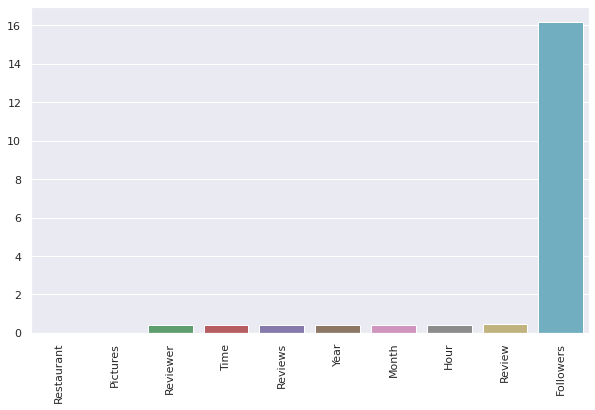

In [24]:
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);

observation : We can see that followers columns has large number of mising values

(0.0, 1.0)

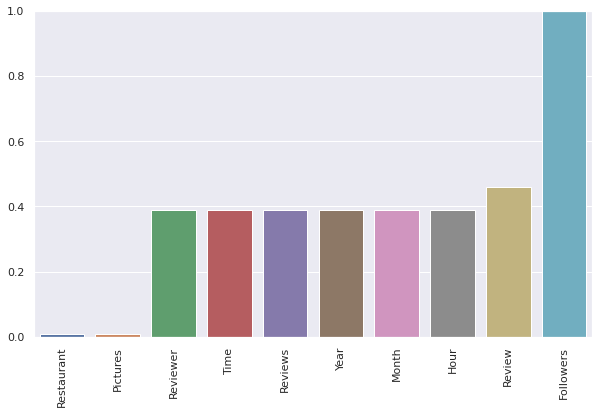

In [25]:
# checking for missing value colums which are less than 1 percent
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);
# Set 1% Threshold
plt.ylim(0,1)

In [26]:
percent_nan[percent_nan < 1]

Restaurant    0.01
Pictures      0.01
Reviewer      0.39
Time          0.39
Reviews       0.39
Year          0.39
Month         0.39
Hour          0.39
Review        0.46
dtype: float64

observation : since most of the column missing percentage is 39% so, it quite possible that same row of each column is having null value, if so we can remove those row, lets check it...

In [27]:

100/len(reviews_df)


0.01

In [28]:
reviews_df[reviews_df['Restaurant'].isnull()]

,Restaurant,Reviewer,Review,Rating,Time,Pictures,Reviews,Followers,Year,Month,Hour
7601,NaN,NaN,NaN,3.5,NaT,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
reviews_df[reviews_df['Pictures'].isnull()]

,Restaurant,Reviewer,Review,Rating,Time,Pictures,Reviews,Followers,Year,Month,Hour
7601,NaN,NaN,NaN,3.5,NaT,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
reviews_df[reviews_df['Reviewer'].isnull()]

,Restaurant,Reviewer,Review,Rating,Time,Pictures,Reviews,Followers,Year,Month,Hour
7601,NaN,NaN,NaN,3.5,NaT,NaN,NaN,NaN,NaN,NaN,NaN
8777,American Wild Wings,NaN,NaN,3.5,NaT,0.0,NaN,NaN,NaN,NaN,NaN
8778,American Wild Wings,NaN,NaN,3.5,NaT,0.0,NaN,NaN,NaN,NaN,NaN
8779,American Wild Wings,NaN,NaN,3.5,NaT,0.0,NaN,NaN,NaN,NaN,NaN
8780,American Wild Wings,NaN,NaN,3.5,NaT,0.0,NaN,NaN,NaN,NaN,NaN
8781,American Wild Wings,NaN,NaN,3.5,NaT,0.0,NaN,NaN,NaN,NaN,NaN
8782,American Wild Wings,NaN,NaN,3.5,NaT,0.0,NaN,NaN,NaN,NaN,NaN
8783,American Wild Wings,NaN,NaN,3.5,NaT,0.0,NaN,NaN,NaN,NaN,NaN
8784,American Wild Wings,NaN,NaN,3.5,NaT,0.0,NaN,NaN,NaN,NaN,NaN
8785,American Wild Wings,NaN,NaN,3.5,NaT,0.0,NaN,NaN,NaN,NaN,NaN


In [31]:
reviews_df[reviews_df['Followers'].isna()]

,Restaurant,Reviewer,Review,Rating,Time,Pictures,Reviews,Followers,Year,Month,Hour
5,Beyond Flavours,Nagabhavani K,"Ambiance is good, service is good, food is aPr...",5.0,2019-05-24 15:22:00,0.0,1.0,NaN,2019.0,5.0,15.0
6,Beyond Flavours,Jamuna Bhuwalka,"Its a very nice place, ambience is different, ...",5.0,2019-05-24 01:02:00,0.0,1.0,NaN,2019.0,5.0,1.0
7,Beyond Flavours,Sandhya S,Well after reading so many reviews finally vis...,4.0,2019-05-23 15:01:00,0.0,1.0,NaN,2019.0,5.0,15.0
14,Beyond Flavours,Kankaria.ritu,"We ordered corn cheese balls, manchow soup and...",1.0,2019-05-22 21:19:00,0.0,1.0,NaN,2019.0,5.0,21.0
24,Beyond Flavours,Amritap Datta,"Excellent experience, mouthwatering food, good...",5.0,2019-05-20 23:33:00,0.0,1.0,NaN,2019.0,5.0,23.0
...,...,...,...,...,...,...,...,...,...,...,...
9912,Chinese Pavilion,Anil Rao,The tofu with mushrooms was absolutely wonderf...,5.0,2019-04-04 02:15:00,0.0,9.0,NaN,2019.0,4.0,2.0
9918,Chinese Pavilion,Ajay Munjal,The food is delicious. Service is excellent. I...,5.0,2019-02-16 13:56:00,0.0,4.0,NaN,2019.0,2.0,13.0
9933,Chinese Pavilion,Korak Mukherjee,I was here last night with 2 of my friends. We...,1.0,2018-05-29 16:02:00,1.0,9.0,NaN,2018.0,5.0,16.0
9940,Chinese Pavilion,Anubinda Dash,The food was amazing. Do not forget to try 'Mo...,4.5,2018-03-02 19:54:00,10.0,11.0,NaN,2018.0,3.0,19.0


In [32]:
reviews_df['Followers'].fillna(0,inplace=True)

In [33]:
# since all the data is cleaned and the missing data is common for all the features we can drop them all
reviews_df.dropna(inplace=True)

In [34]:
reviews_df.isnull().sum()

Restaurant    0
Reviewer      0
Review        0
Rating        0
Time          0
Pictures      0
Reviews       0
Followers     0
Year          0
Month         0
Hour          0
dtype: int64

---
# EDA
---

## Meta Data

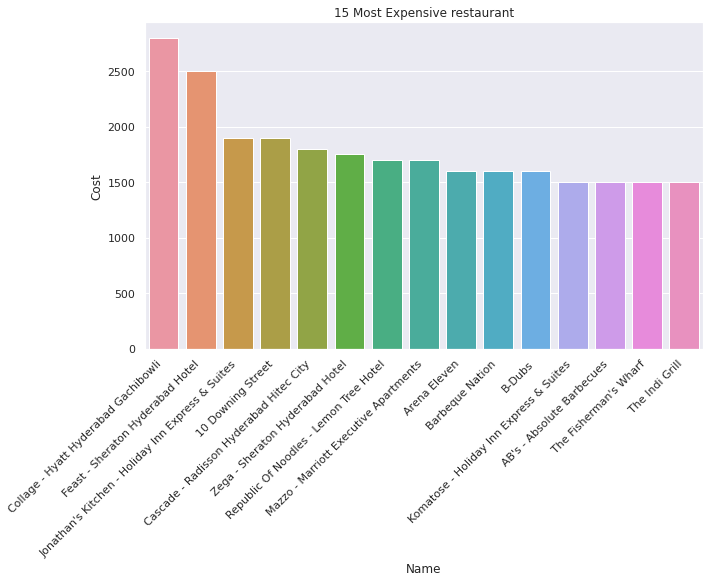

In [35]:
# checking for most expensive Restaurant
sns.barplot(y='Cost',
            x="Name", 
            data=meta_df, 
            order=meta_df.sort_values('Cost',ascending=False).Name[:15])
plt.xticks(rotation=45,ha='right')
plt.title('15 Most Expensive restaurant')
plt.show()

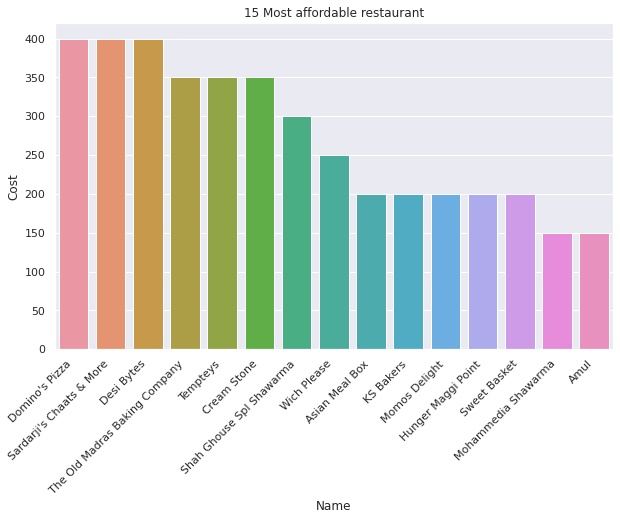

In [36]:
# checking for most affordable Restaurant
sns.barplot(y='Cost',
            x="Name", 
            data=meta_df, 
            order=meta_df.sort_values('Cost',ascending=False).Name[-15:])
plt.xticks(rotation=45,ha='right')
plt.title('15 Most affordable restaurant')
plt.show()

In [37]:
# lets find the most cusines offered by Restaurants
meta_df.Cuisines     

0      Chinese, Continental, Kebab, European, South I...
1                         Biryani, North Indian, Chinese
2           Asian, Mediterranean, North Indian, Desserts
3      Biryani, North Indian, Chinese, Seafood, Bever...
4      Asian, Continental, North Indian, Chinese, Med...
                             ...                        
100                                     Fast Food, Salad
101                                       Bakery, Mithai
102                       North Indian, Biryani, Chinese
103                                            Fast Food
104                      Thai, Asian, Chinese, Malaysian
Name: Cuisines, Length: 105, dtype: object

In [38]:
# spliting the cusines and storing in list 
cuisine_list=meta_df.Cuisines.str.split(', ')
cuisine_list

0      [Chinese, Continental, Kebab, European, South ...
1                       [Biryani, North Indian, Chinese]
2         [Asian, Mediterranean, North Indian, Desserts]
3      [Biryani, North Indian, Chinese, Seafood, Beve...
4      [Asian, Continental, North Indian, Chinese, Me...
                             ...                        
100                                   [Fast Food, Salad]
101                                     [Bakery, Mithai]
102                     [North Indian, Biryani, Chinese]
103                                          [Fast Food]
104                    [Thai, Asian, Chinese, Malaysian]
Name: Cuisines, Length: 105, dtype: object

In [39]:
# storing all the cusines in a dict 
cuis_dict = {}
for names in cuisine_list:
    for name in names:
        if (name in cuis_dict):
            cuis_dict[name]+=1
        else:  
            cuis_dict[name]=1 

In [40]:
# converting the dict to a data frame 
cuis_df=pd.DataFrame.from_dict([cuis_dict]).transpose().reset_index().rename(columns={'index':'Cuisine',0:'Number of Restaurants'})

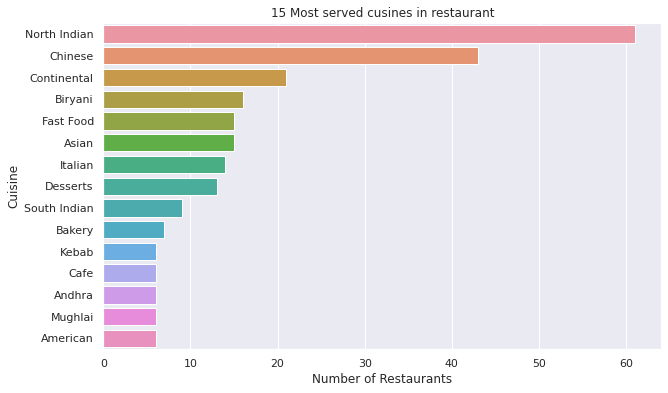

In [41]:
# graph for most cusines served in restaurant
sns.barplot(y='Cuisine',
            x="Number of Restaurants", 
            data=cuis_df, 
            order=cuis_df.sort_values('Number of Restaurants',ascending=False).Cuisine[:15])
plt.title('15 Most served cusines in restaurant')
plt.show()


In [42]:
# spliting the cusines and storing in list 
Collections_list=meta_df.Collections.dropna().str.split(', ')
Collections_list

0      [Food Hygiene Rated Restaurants in Hyderabad, ...
1                                  [Hyderabad's Hottest]
2                   [Great Buffets, Hyderabad's Hottest]
3                               [Late Night Restaurants]
4      [Best Bars & Pubs, Food Hygiene Rated Restaura...
5      [Sunday Brunches, Corporate Favorites, Great B...
6          [Food Hygiene Rated Restaurants in Hyderabad]
8      [Great Buffets, Live Sports Screenings, Best B...
9                                      [Frozen Delights]
10       [Street Food, Veggie Friendly, Pocket Friendly]
11                                    [Barbecue & Grill]
12                                       [Great Buffets]
13     [Corporate Favorites, Happy Hours, Live Sports...
14     [Barbecue & Grill, Great Buffets, Corporate Fa...
18                                  [Trending This Week]
19                                  [Trending This Week]
20                                     [Veggie Friendly]
21                      [Great 

In [43]:
# storing all the cusines in a dict 
Collections_dict = {}
for names in Collections_list:
    for name in names:
        if (name in Collections_dict):
            Collections_dict[name]+=1
        else:  
            Collections_dict[name]=1 

In [44]:
# converting the dict to a data frame 
Collections_df=pd.DataFrame.from_dict([Collections_dict]).transpose().reset_index().rename(columns={'index':'Taggs',0:'Number of Restaurants'})

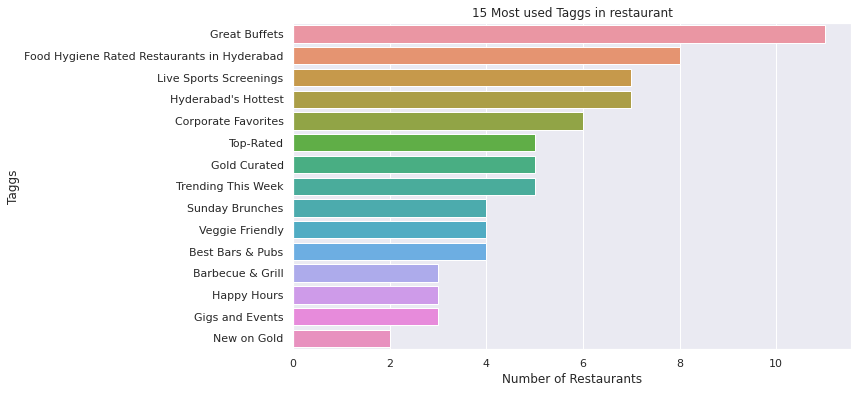

In [45]:
# graph for most cusines served in restaurant
sns.barplot(y='Taggs',
            x="Number of Restaurants", 
            data=Collections_df, 
            order=Collections_df.sort_values('Number of Restaurants',ascending=False).Taggs[:15])
plt.title('15 Most used Taggs in restaurant')
plt.show()


## Reviews

In [46]:
reviews_df.head()

,Restaurant,Reviewer,Review,Rating,Time,Pictures,Reviews,Followers,Year,Month,Hour
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5.0,2019-05-25 15:54:00,0.0,1.0,2.0,2019.0,5.0,15.0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5.0,2019-05-25 14:20:00,0.0,3.0,2.0,2019.0,5.0,14.0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5.0,2019-05-24 22:54:00,0.0,2.0,3.0,2019.0,5.0,22.0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5.0,2019-05-24 22:11:00,0.0,1.0,1.0,2019.0,5.0,22.0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5.0,2019-05-24 21:37:00,0.0,3.0,2.0,2019.0,5.0,21.0


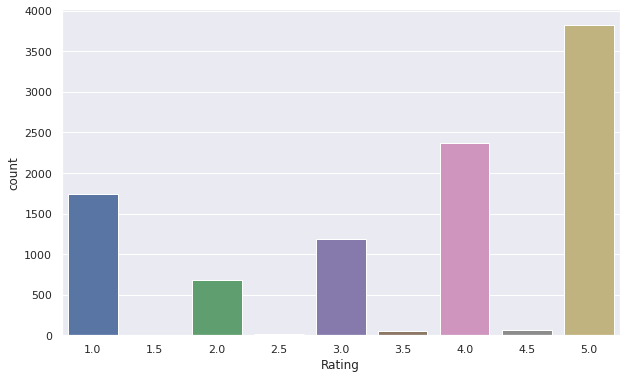

In [47]:
sns.countplot(reviews_df.Rating)

**lets find the restaurant with best reviews**

In [48]:
reviews_df

,Restaurant,Reviewer,Review,Rating,Time,Pictures,Reviews,Followers,Year,Month,Hour
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5.0,2019-05-25 15:54:00,0.0,1.0,2.0,2019.0,5.0,15.0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5.0,2019-05-25 14:20:00,0.0,3.0,2.0,2019.0,5.0,14.0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5.0,2019-05-24 22:54:00,0.0,2.0,3.0,2019.0,5.0,22.0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5.0,2019-05-24 22:11:00,0.0,1.0,1.0,2019.0,5.0,22.0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5.0,2019-05-24 21:37:00,0.0,3.0,2.0,2019.0,5.0,21.0
...,...,...,...,...,...,...,...,...,...,...,...
9995,Chinese Pavilion,Abhishek Mahajan,Madhumathi Mahajan Well to start with nice cou...,3.0,2016-06-05 00:08:00,0.0,53.0,54.0,2016.0,6.0,0.0
9996,Chinese Pavilion,Sharad Agrawal,This place has never disappointed us.. The foo...,4.5,2016-06-04 22:01:00,0.0,2.0,53.0,2016.0,6.0,22.0
9997,Chinese Pavilion,Ramandeep,"Bad rating is mainly because of ""Chicken Bone ...",1.5,2016-06-03 10:37:00,3.0,65.0,423.0,2016.0,6.0,10.0
9998,Chinese Pavilion,Nayana Shanbhag,I personally love and prefer Chinese Food. Had...,4.0,2016-05-31 17:22:00,0.0,13.0,144.0,2016.0,5.0,17.0


In [49]:
df_rating = reviews_df.groupby(['Restaurant']).agg({'Rating':'mean','Restaurant':'count'}).rename(columns={'Restaurant':'number_of_rating'}).reset_index()
df_rating.describe()

,Rating,number_of_rating
count,100.000000,100.00000
mean,3.601891,99.54000
std,0.508100,2.73924
min,2.400000,77.00000
25%,3.245000,100.00000
50%,3.613081,100.00000
75%,3.846250,100.00000
max,4.880000,100.00000


* looks like we got 100 rating for all the restaurants

Text(0.5, 1.0, 'Top 10 Restaurants by Rating')

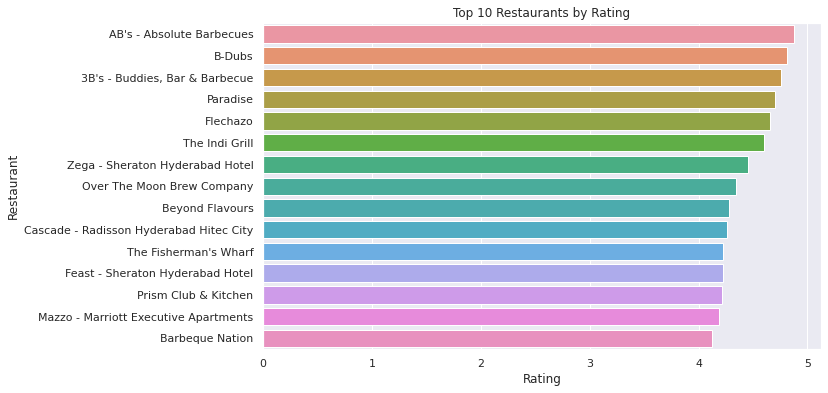

In [50]:
sns.barplot(data=df_rating, x='Rating', y='Restaurant', order=df_rating.sort_values('Rating',ascending=False).Restaurant[:15])
plt.title('Top 10 Restaurants by Rating')

In [51]:
df_Reviewer = reviews_df.groupby(['Reviewer']).agg({'Reviews':'sum','Followers':'sum','Rating':'mean'}).reset_index()
most_famous_reviewer=df_Reviewer[(df_Reviewer['Followers'] > 10000)&(df_Reviewer['Reviews']>100)&(df_Reviewer['Rating']>3.5)]
most_famous_reviewer

,Reviewer,Reviews,Followers,Rating
56,Aanchal Khemka,945.0,11605.0,3.600000
903,Asad Rana,1086.0,12306.0,3.666667
1019,Avin Seth,1576.0,11064.0,4.500000
1285,Buddiga Sindhuri,300.0,10033.0,4.200000
1768,Food Nawabs,520.0,22129.0,4.000000
1786,Foodies Hyderabad,124.0,37976.0,4.500000
2173,Hungry Eyes,208.0,10258.0,5.000000
2816,Kunal Khanra,756.0,11440.0,4.750000
3480,Namit Agarwal,1253.0,13139.0,3.857143
4496,Rajat Goel ✳️,444.0,10149.0,4.000000


In [52]:
df_Reviewer.describe([0.90])

,Reviews,Followers,Rating
count,7442.000000,7442.000000,7442.000000
mean,32.111664,218.183284,3.578302
std,114.700948,1222.190701,1.502574
min,0.000000,0.000000,1.000000
50%,3.000000,4.000000,4.000000
90%,67.000000,266.900000,5.000000
max,3093.000000,40230.000000,5.000000


Text(0.5, 1.0, 'Top 15 Reviewers by no of reviews')

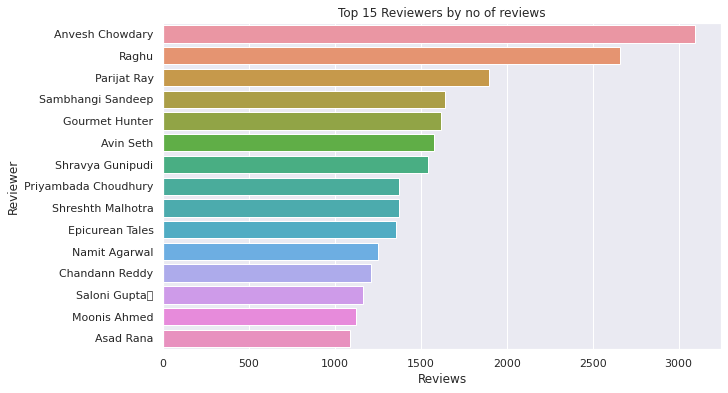

In [53]:
sns.barplot(data=df_Reviewer, x='Reviews', y='Reviewer', order=df_Reviewer.sort_values('Reviews',ascending=False).Reviewer[:15])
plt.title('Top 15 Reviewers by no of reviews')

Text(0.5, 1.0, 'Top 15 Reviewers by no of Followers')

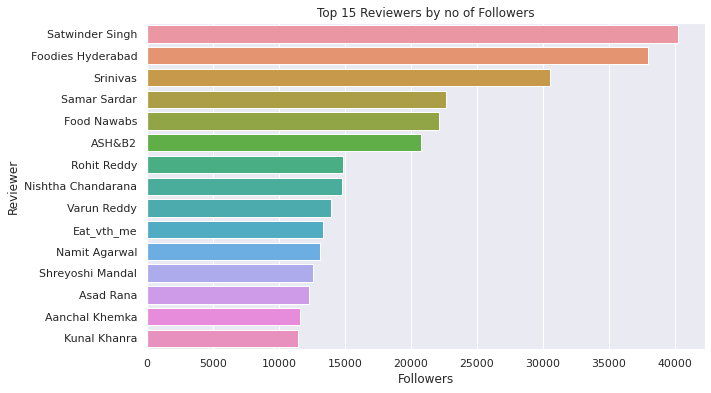

In [54]:
sns.barplot(data=df_Reviewer, x='Followers', y='Reviewer', order=df_Reviewer.sort_values('Followers',ascending=False).Reviewer[:15])
plt.title('Top 15 Reviewers by no of Followers')

Text(0.5, 1.0, 'Top reviewers to focus on')

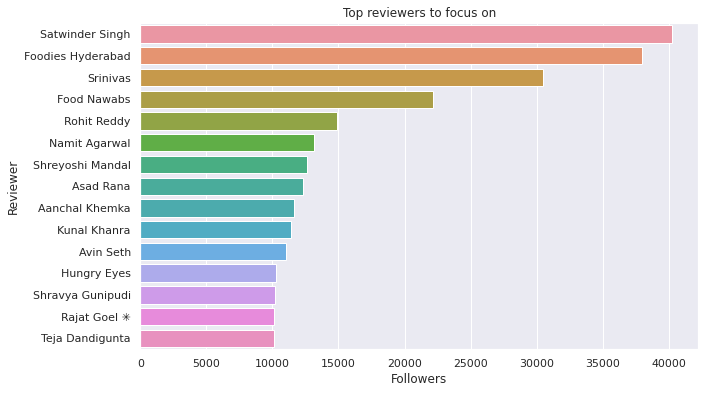

In [55]:
most_famous_reviewer
sns.barplot(data=most_famous_reviewer, x='Followers', y='Reviewer', order=most_famous_reviewer.sort_values('Followers',ascending=False).Reviewer[:15])
plt.title('Top reviewers to focus on')

* these are the reviewer  a restaurant should focus on who have reviewed more than 100 restaurants and have followers greater than 10000 with an average rating above 3.5

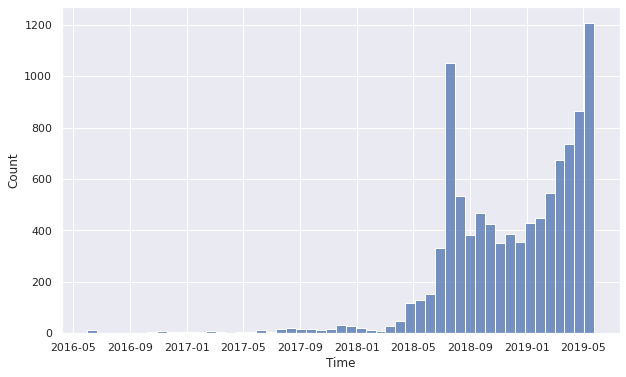

In [56]:
sns.histplot(reviews_df.Time)

* looks like most of people started reviewing restaurant after may 2018

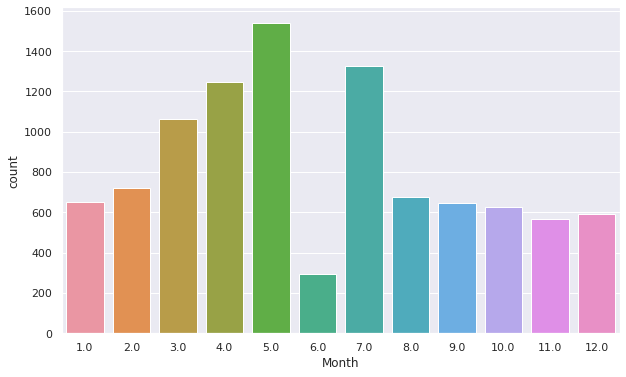

In [57]:
sns.countplot(reviews_df.Month)

*most of the reviews are in the month of 5 and 7 month of year 

# Text processing 

In [58]:
reviews=reviews_df.Review
reviews

0       The ambience was good, food was quite good . h...
1       Ambience is too good for a pleasant evening. S...
2       A must try.. great food great ambience. Thnx f...
3       Soumen das and Arun was a great guy. Only beca...
4       Food is good.we ordered Kodi drumsticks and ba...
                              ...                        
9995    Madhumathi Mahajan Well to start with nice cou...
9996    This place has never disappointed us.. The foo...
9997    Bad rating is mainly because of "Chicken Bone ...
9998    I personally love and prefer Chinese Food. Had...
9999    Checked in here to try some delicious chinese ...
Name: Review, Length: 9954, dtype: object

In [59]:
!pip install contractions

     |████████████████████████████████| 321 kB 33.9 MB/s 
     |████████████████████████████████| 284 kB 62.8 MB/s 
  Created wheel for pyahocorasick: filename=pyahocorasick-1.4.2-cp37-cp37m-linux_x86_64.whl size=85444 sha256=eafa23644901ce37d6ada5a353a02b42817a0935557bd0626261335d29eea1ae
  Stored in directory: /root/.cache/pip/wheels/25/19/a6/8f363d9939162782bb8439d886469756271abc01f76fbd790f
Successfully built pyahocorasick


In [60]:
def lower_case(text):
  '''convert the string in lower case 
  '''
  text=[x.lower() for x in text]
  return text

import string
def remove_punctuation (text):
  '''remove punctuation from the the list of strings
  '''
  text = [''.join(c for c in s if c not in string.punctuation) for s in text]
  return text

import re
regex = re.compile('[^a-zA-Z]')
def remove_non_leters(text):
  '''used to remove all non leters form the list 
  '''
  text=[regex.sub(' ', x) for x in text]
  return text

def remove_all_extra_spaces (text):
  '''removes all extra space from the text
  '''
  for index,x in enumerate(text):
    text[index]=" ".join(x.split())
  return text
  
import string
ascii_chars = set(string.printable)  # speeds things up
def remove_non_ascii_prinatble_from_list(list_of_words):
  '''removes non ascii charaters from text
  '''
  return [word for word in list_of_words 
            if all(char in ascii_chars for char in word)]

import contractions
def remove_contrations(text):
  for index,x in enumerate(text):
    text[index] = contractions.fix(x)
  return text

def lemmatization_(text):
  for index,x in enumerate(text):
    doc = nlp(x)  
    l=list()
    for word in doc:
        l.append(word.lemma_)
    text[index]=' '.join(l)

  return text
  
# Removing StopWord
def Change_text(msg):
  main_text=[word for word in no_punc.split() if word.lower() not in stop_list]
  return ' '.join(main_text)

In [61]:
#download small spacy model
!python -m spacy download en_core_web_sm

     |████████████████████████████████| 12.0 MB 39.3 MB/s 
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')


In [62]:
import spacy
nlp = spacy.load('en_core_web_sm')

In [63]:
# Print the set of spaCy's default stop words (remember that sets are unordered):
print(nlp.Defaults.stop_words)

{'six', 'too', 'ours', 'very', 'not', 'all', 'yourself', 'off', 'doing', 'back', 'who', 'anyway', 're', 'these', "'re", 'whereby', 'by', 'also', 'they', 'whole', 'empty', 'herself', 'will', 'rather', '’ve', 'somehow', 'its', 'wherein', 'sometimes', '‘s', 'because', 'mostly', 'used', 'here', 'ever', 'when', 'which', 'than', 'in', 'whether', '‘m', 'ourselves', 'last', 'into', 'almost', 'up', 'him', 'still', 'already', 'really', 'may', 'had', 'once', 'become', 'except', 'towards', 'over', 'himself', 'for', 'thereupon', 'top', 'out', 'hereupon', 'bottom', 'must', 'various', 'her', 'although', 'everywhere', 'you', '‘ll', 'hereby', 'am', 'and', 'via', 'together', 'anyone', 'whence', 'sometime', 'behind', 'hence', 'how', 'among', 'then', 'beside', 'however', 'seemed', 'should', 'does', 'show', 'otherwise', 'full', 'anyhow', 'done', 'either', 'give', 'seem', 'n‘t', 'why', 'one', 'more', 'are', 'his', 'unless', 'whatever', 'further', 'where', 'per', 'as', 'fifteen', 'those', 'he', 'first', 'at'

In [64]:
print(nlp.vocab['-PRON-'].is_stop)

False


In [65]:
# Add the word to the set of stop words. Use lowercase!
nlp.Defaults.stop_words.add('-PRON-')

# Set the stop_word tag on the lexeme
nlp.vocab['-PRON-'].is_stop = True

In [66]:
# Add the word to the set of stop words. Use lowercase!
nlp.Defaults.stop_words.add('pron')

# Set the stop_word tag on the lexeme
nlp.vocab['-PRON-'].is_stop = True

In [67]:
print(nlp.vocab['pron'].is_stop)

True


In [68]:
stop_word_list=list(nlp.Defaults.stop_words)

In [69]:
stop_word_list

['six',
 'too',
 'ours',
 'very',
 'not',
 'all',
 'yourself',
 'off',
 'doing',
 'back',
 'who',
 'anyway',
 're',
 'these',
 "'re",
 'whereby',
 'by',
 'also',
 'they',
 'whole',
 'empty',
 'herself',
 'will',
 'rather',
 '’ve',
 'somehow',
 'its',
 'wherein',
 'sometimes',
 '‘s',
 'because',
 'mostly',
 'used',
 'here',
 'ever',
 'when',
 'which',
 'than',
 'in',
 'whether',
 '‘m',
 'ourselves',
 'last',
 'into',
 'almost',
 'up',
 'him',
 'still',
 'already',
 'really',
 'may',
 'had',
 'once',
 'become',
 'except',
 'towards',
 'over',
 'himself',
 'for',
 'thereupon',
 'top',
 'out',
 'hereupon',
 'bottom',
 'must',
 'various',
 'her',
 'although',
 'everywhere',
 'you',
 '‘ll',
 'hereby',
 'am',
 'and',
 'via',
 'together',
 'anyone',
 'whence',
 'sometime',
 'behind',
 'hence',
 'how',
 'among',
 'then',
 'beside',
 'however',
 'seemed',
 'should',
 'does',
 'show',
 'otherwise',
 'full',
 'anyhow',
 'done',
 'either',
 'give',
 'seem',
 'n‘t',
 'why',
 'one',
 'more',
 'are',


In [70]:
# convert the string in lower case, remove punctuation, non leters(numbers, emoji etc),extra spaces, and non ascii characters 
reviews=lower_case(reviews)
reviews=remove_punctuation(reviews)
reviews=remove_non_leters(reviews)
reviews=remove_all_extra_spaces(reviews)
reviews=remove_non_ascii_prinatble_from_list(reviews)
reviews=remove_contrations(reviews)
reviews=lemmatization_(reviews)

In [71]:
all_words=' '.join(reviews)
all_words

'the ambience be good food be quite good have saturday lunch which be cost effective good place for a sate brunch one can also chill with friend and or parent waiter souman das be really courteous and helpful ambience be too good for a pleasant evening service be very prompt food be good over all a good experience souman da kudo to the service a must try great food great ambience thnx for the service by pradeep and subroto -PRON- personal recommendation be penne alfredo pasta also the music in the background be amazing soumen das and arun be a great guy only because of -PRON- behavior and sincerety and good food off course i would like to visit this place again food be goodwe order kodi drumstick and basket mutton biryani all be good thank to pradeep -PRON- serve well -PRON- enjoy here ambience be also very good ambiance be good service be good food be apradeecp and subro good service food be good papiya good hostess and ur caption very good this be star restaurant -PRON- a very nice p

In [72]:
reviews

['the ambience be good food be quite good have saturday lunch which be cost effective good place for a sate brunch one can also chill with friend and or parent waiter souman das be really courteous and helpful',
 'ambience be too good for a pleasant evening service be very prompt food be good over all a good experience souman da kudo to the service',
 'a must try great food great ambience thnx for the service by pradeep and subroto -PRON- personal recommendation be penne alfredo pasta also the music in the background be amazing',
 'soumen das and arun be a great guy only because of -PRON- behavior and sincerety and good food off course i would like to visit this place again',
 'food be goodwe order kodi drumstick and basket mutton biryani all be good thank to pradeep -PRON- serve well -PRON- enjoy here ambience be also very good',
 'ambiance be good service be good food be apradeecp and subro good service food be good papiya good hostess and ur caption very good this be star restaurant

In [73]:
reviews_df['Reviews']=reviews

In [74]:
reviews_df.head()

,Restaurant,Reviewer,Review,Rating,Time,Pictures,Reviews,Followers,Year,Month,Hour
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5.0,2019-05-25 15:54:00,0.0,the ambience be good food be quite good have s...,2.0,2019.0,5.0,15.0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5.0,2019-05-25 14:20:00,0.0,ambience be too good for a pleasant evening se...,2.0,2019.0,5.0,14.0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5.0,2019-05-24 22:54:00,0.0,a must try great food great ambience thnx for ...,3.0,2019.0,5.0,22.0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5.0,2019-05-24 22:11:00,0.0,soumen das and arun be a great guy only becaus...,1.0,2019.0,5.0,22.0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5.0,2019-05-24 21:37:00,0.0,food be goodwe order kodi drumstick and basket...,2.0,2019.0,5.0,21.0


In [75]:
#removing words greater than 45 and less than 2
def len_less_than2(review):
  review=" ".join([i for i in review.split() if len(i)>2])
  review=" ".join([i for i in review.split() if len(i)<=45])
  return review

In [76]:
reviews_df['Reviews']=reviews_df['Reviews'].apply(lambda x:len_less_than2(x))

In [77]:
reviews_df

,Restaurant,Reviewer,Review,Rating,Time,Pictures,Reviews,Followers,Year,Month,Hour
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5.0,2019-05-25 15:54:00,0.0,the ambience good food quite good have saturda...,2.0,2019.0,5.0,15.0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5.0,2019-05-25 14:20:00,0.0,ambience too good for pleasant evening service...,2.0,2019.0,5.0,14.0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5.0,2019-05-24 22:54:00,0.0,must try great food great ambience thnx for th...,3.0,2019.0,5.0,22.0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5.0,2019-05-24 22:11:00,0.0,soumen das and arun great guy only because -PR...,1.0,2019.0,5.0,22.0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5.0,2019-05-24 21:37:00,0.0,food goodwe order kodi drumstick and basket mu...,2.0,2019.0,5.0,21.0
...,...,...,...,...,...,...,...,...,...,...,...
9995,Chinese Pavilion,Abhishek Mahajan,Madhumathi Mahajan Well to start with nice cou...,3.0,2016-06-05 00:08:00,0.0,madhumathi mahajan well start with nice courte...,54.0,2016.0,6.0,0.0
9996,Chinese Pavilion,Sharad Agrawal,This place has never disappointed us.. The foo...,4.5,2016-06-04 22:01:00,0.0,this place have never disappoint -PRON- the fo...,53.0,2016.0,6.0,22.0
9997,Chinese Pavilion,Ramandeep,"Bad rating is mainly because of ""Chicken Bone ...",1.5,2016-06-03 10:37:00,3.0,bad rating mainly because chicken bone find ve...,423.0,2016.0,6.0,10.0
9998,Chinese Pavilion,Nayana Shanbhag,I personally love and prefer Chinese Food. Had...,4.0,2016-05-31 17:22:00,0.0,personally love and prefer chinese food have h...,144.0,2016.0,5.0,17.0


In [78]:
reviews_df=reviews_df.drop('Review',axis=1)

In [79]:
reviews_df

,Restaurant,Reviewer,Rating,Time,Pictures,Reviews,Followers,Year,Month,Hour
0,Beyond Flavours,Rusha Chakraborty,5.0,2019-05-25 15:54:00,0.0,the ambience good food quite good have saturda...,2.0,2019.0,5.0,15.0
1,Beyond Flavours,Anusha Tirumalaneedi,5.0,2019-05-25 14:20:00,0.0,ambience too good for pleasant evening service...,2.0,2019.0,5.0,14.0
2,Beyond Flavours,Ashok Shekhawat,5.0,2019-05-24 22:54:00,0.0,must try great food great ambience thnx for th...,3.0,2019.0,5.0,22.0
3,Beyond Flavours,Swapnil Sarkar,5.0,2019-05-24 22:11:00,0.0,soumen das and arun great guy only because -PR...,1.0,2019.0,5.0,22.0
4,Beyond Flavours,Dileep,5.0,2019-05-24 21:37:00,0.0,food goodwe order kodi drumstick and basket mu...,2.0,2019.0,5.0,21.0
...,...,...,...,...,...,...,...,...,...,...
9995,Chinese Pavilion,Abhishek Mahajan,3.0,2016-06-05 00:08:00,0.0,madhumathi mahajan well start with nice courte...,54.0,2016.0,6.0,0.0
9996,Chinese Pavilion,Sharad Agrawal,4.5,2016-06-04 22:01:00,0.0,this place have never disappoint -PRON- the fo...,53.0,2016.0,6.0,22.0
9997,Chinese Pavilion,Ramandeep,1.5,2016-06-03 10:37:00,3.0,bad rating mainly because chicken bone find ve...,423.0,2016.0,6.0,10.0
9998,Chinese Pavilion,Nayana Shanbhag,4.0,2016-05-31 17:22:00,0.0,personally love and prefer chinese food have h...,144.0,2016.0,5.0,17.0


In [80]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [81]:
tfidf=TfidfVectorizer(stop_words=stop_word_list)

In [82]:
transformed_reviews=tfidf.fit_transform(reviews_df['Reviews'])

# LDA

In [83]:
from sklearn.decomposition import LatentDirichletAllocation

In [84]:
# Parameters tuning using Grid Search
from sklearn.model_selection import GridSearchCV


# LDA model
lda = LatentDirichletAllocation(n_components=5)

lda.fit(transformed_reviews)





NameError: ignored

In [86]:
# print("Best LDA model's params" , lda_model.best_params_)
# print("Best log likelihood Score for the LDA model",lda_model.best_score_)
# print("LDA model Perplexity on train data", best_lda_model.perplexity(transformed_reviews))

In [87]:
lda.components_

array([[0.45065092, 0.44785233, 0.30440234, ..., 0.20999927, 0.606104  ,
        0.20000572],
       [0.20229152, 0.20001376, 0.20001045, ..., 0.22258273, 0.20487275,
        0.20000538],
       [0.20007007, 0.20006159, 0.2000552 , ..., 0.79409644, 0.20004175,
        0.20001728],
       [0.20005632, 0.20004379, 0.20003436, ..., 0.21364921, 0.20002869,
        0.20001658],
       [0.20006119, 0.20005388, 0.20004195, ..., 0.29797703, 0.200032  ,
        0.38324496]])

In [88]:
for index,topic in enumerate(lda.components_):
    print(f'THE TOP 15 WORDS FOR TOPIC #{index}')
    print([tfidf.get_feature_names()[i] for i in topic.argsort()[-15:]])
    print('\n')

THE TOP 15 WORDS FOR TOPIC #0
['paneer', 'quantity', 'restaurant', 'quality', 'rice', 'like', 'try', 'place', 'bad', 'biryani', 'food', 'taste', 'good', 'chicken', 'order']


THE TOP 15 WORDS FOR TOPIC #1
['experience', 'amazing', 'serve', 'friend', 'awesome', 'nice', 'staff', 'visit', 'time', 'ambience', 'great', 'service', 'food', 'good', 'place']


THE TOP 15 WORDS FOR TOPIC #2
['goo', 'dominos', 'food', 'communication', 'sambar', 'wrong', 'order', 'gud', 'receive', 'late', 'time', 'fast', 'bad', 'deliver', 'delivery']


THE TOP 15 WORDS FOR TOPIC #3
['thank', 'burger', 'velvet', 'awsome', 'food', 'good', 'cream', 'cupcake', 'job', 'brownie', 'superb', 'chocolate', 'super', 'cake', 'excellent']


THE TOP 15 WORDS FOR TOPIC #4
['jayanta', 'parathas', 'quality', 'shivam', 'low', 'test', 'thank', 'govind', 'taste', 'tasty', 'food', 'service', 'quantity', 'nice', 'good']




In [89]:
!pip install pyLDAvis==2.1.2

     |████████████████████████████████| 1.6 MB 32.7 MB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-2.1.2-py2.py3-none-any.whl size=97738 sha256=6a99b50737affca1c8b44639e1aaee0a72b9c6777cd7974e5b5914a7c5129acf
  Stored in directory: /root/.cache/pip/wheels/3b/fb/41/e32e5312da9f440d34c4eff0d2207b46dc9332a7b931ef1e89
Successfully built pyLDAvis


In [90]:
import pyLDAvis.sklearn

pyLDAvis.enable_notebook()

/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable
/usr/local/lib/python3.7/dist-packages/past/builtins/misc.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Mapping


In [91]:
lda_panel = pyLDAvis.sklearn.prepare(lda, transformed_reviews,tfidf,mds='tsne')
lda_panel

PreparedData(topic_coordinates=                x           y  topics  cluster       Freq
topic                                                    
1      150.222153  -72.269554       1        1  40.768370
0       51.163364 -159.968018       2        1  39.308220
3      -73.144554   21.523815       3        1   7.660570
4      -66.410133 -110.606438       4        1   6.505693
2       54.417324   12.443444       5        1   5.757147, topic_info=            Term        Freq       Total Category  logprob  loglift
5551        good  607.000000  607.000000  Default  30.0000  30.0000
9000        nice  168.000000  168.000000  Default  29.0000  29.0000
3496    delivery  109.000000  109.000000  Default  28.0000  28.0000
4418   excellent   76.000000   76.000000  Default  27.0000  27.0000
3490     deliver   57.000000   57.000000  Default  26.0000  26.0000
...          ...         ...         ...      ...      ...      ...
13197      super    1.825484   40.022956   Topic5  -7.0549  -0.2329
2651        cold    1.645726   32.552288   Topic5  -7.1585  -0.1299
4924        food    2.063470  368.051797   Topic5  -6.9323  -2.3291
8427         min    1.501238   25.856858   Topic5  -7.2504   0.0084
13663      thank    1.460036   62.104530   Topic5  -7.2783  -0.8956

[334 rows x 6 columns], token_table=       Topic      Freq     Term
term                           
278        1  0.895643  alcohol
326        5  0.684068    alloo
329        1  0.907949    allow
373        4  0.466988      alu
388        1  0.696334  amazing
...      ...       ...      ...
15103      5  0.271096    wrong
15128      3  0.643302    yadav
15140      3  0.550650   yamuna
15195      4  0.560757     yuck
15260      3  0.874787   zinger

[496 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 1, 4, 5, 3])

In [93]:

topic_results = lda.transform(transformed_reviews)

In [94]:
reviews_df['sentiments']=topic_results.argmax(axis=1)

In [95]:
reviews_df.head()

,Restaurant,Reviewer,Rating,Time,Pictures,Reviews,Followers,Year,Month,Hour,sentiments
0,Beyond Flavours,Rusha Chakraborty,5.0,2019-05-25 15:54:00,0.0,the ambience good food quite good have saturda...,2.0,2019.0,5.0,15.0,1
1,Beyond Flavours,Anusha Tirumalaneedi,5.0,2019-05-25 14:20:00,0.0,ambience too good for pleasant evening service...,2.0,2019.0,5.0,14.0,1
2,Beyond Flavours,Ashok Shekhawat,5.0,2019-05-24 22:54:00,0.0,must try great food great ambience thnx for th...,3.0,2019.0,5.0,22.0,1
3,Beyond Flavours,Swapnil Sarkar,5.0,2019-05-24 22:11:00,0.0,soumen das and arun great guy only because -PR...,1.0,2019.0,5.0,22.0,0
4,Beyond Flavours,Dileep,5.0,2019-05-24 21:37:00,0.0,food goodwe order kodi drumstick and basket mu...,2.0,2019.0,5.0,21.0,1


In [96]:
reviews_df['Rating'].value_counts()

5.0    3826
4.0    2373
1.0    1735
3.0    1192
2.0     684
4.5      69
3.5      47
2.5      19
1.5       9
Name: Rating, dtype: int64

In [97]:
reviews_df.shape

(9954, 11)

In [98]:
reviews_df[reviews_df['sentiments']==4 ]['Rating'].value_counts()

5.0    477
4.0     99
1.0     43
3.0     34
2.0     26
Name: Rating, dtype: int64

In [99]:
reviews_df[reviews_df['sentiments']==3 ]['Rating'].value_counts()

5.0    207
4.0     54
1.0     53
2.0     17
3.0     17
4.5     10
3.5      7
2.5      1
Name: Rating, dtype: int64

In [100]:
reviews_df[reviews_df['sentiments']==2 ]['Rating'].value_counts()

5.0    168
1.0     83
4.0     20
3.0     17
2.0     10
Name: Rating, dtype: int64

In [101]:
reviews_df[reviews_df['sentiments']==1 ]['Rating'].value_counts()

5.0    1940
4.0    1096
1.0     532
3.0     521
2.0     243
4.5      29
3.5      14
2.5      13
1.5       3
Name: Rating, dtype: int64

In [102]:
reviews_df[reviews_df['sentiments']==0 ]['Rating'].value_counts()

4.0    1104
5.0    1034
1.0    1024
3.0     603
2.0     388
4.5      30
3.5      26
1.5       6
2.5       5
Name: Rating, dtype: int64

In [103]:
reviews_df[reviews_df['Rating']==3].shape

(1192, 11)

observation : 

In [104]:

from sklearn.decomposition import NMF

In [105]:
nmf_model = NMF(n_components=5,random_state=42)

In [106]:
nmf_model.fit(transformed_reviews)



NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=5, random_state=42, shuffle=False, solver='cd', tol=0.0001,
    verbose=0)

In [107]:
for index,topic in enumerate(nmf_model.components_):
    print(f'THE TOP 15 WORDS FOR TOPIC #{index}')
    print([tfidf.get_feature_names()[i] for i in topic.argsort()[-15:]])
    print('\n')

THE TOP 15 WORDS FOR TOPIC #0
['packing', 'polite', 'test', 'quality', 'quantity', 'price', 'ambiance', 'ambience', 'spicy', 'burger', 'job', 'food', 'taste', 'service', 'good']


THE TOP 15 WORDS FOR TOPIC #1
['serve', 'excellent', 'try', 'friend', 'amazing', 'love', 'time', 'awesome', 'staff', 'visit', 'ambience', 'great', 'service', 'place', 'food']


THE TOP 15 WORDS FOR TOPIC #2
['music', 'sarvice', 'ambiance', 'service', 'overall', 'family', 'hangout', 'enjoy', 'thank', 'staff', 'ambience', 'place', 'friend', 'friendly', 'nice']


THE TOP 15 WORDS FOR TOPIC #3
['zomato', 'thank', 'person', 'awesome', 'guy', 'super', 'excellent', 'order', 'boy', 'quick', 'late', 'deliver', 'fast', 'time', 'delivery']


THE TOP 15 WORDS FOR TOPIC #4
['spicy', 'piece', 'try', 'paneer', 'veg', 'restaurant', 'like', 'quality', 'rice', 'quantity', 'biryani', 'bad', 'order', 'taste', 'chicken']




In [108]:
topic_results = nmf_model.transform(transformed_reviews)

In [109]:
reviews_df['sentiments']=topic_results.argmax(axis=1)

In [119]:
reviews_df[reviews_df['sentiments']==4]['Rating'].value_counts()

Series([], Name: Rating, dtype: int64)

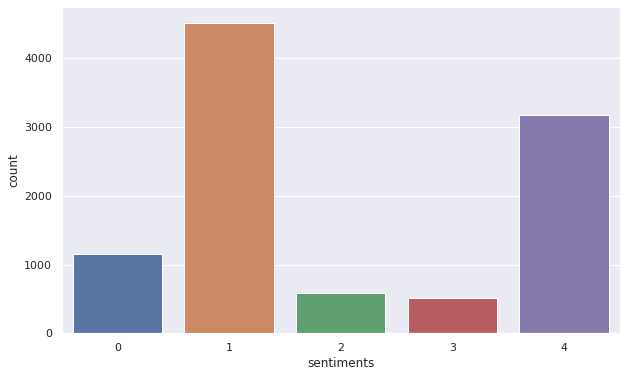

In [111]:
sns.countplot(reviews_df['sentiments'])

In [112]:
reviews_df[reviews_df['sentiments']==3 ]['Rating'].value_counts()

5.0    285
1.0     98
4.0     66
3.0     38
2.0     25
4.5      3
3.5      2
2.5      1
Name: Rating, dtype: int64

In [113]:
reviews_df.Reviews[1]

'ambience too good for pleasant evening service very prompt food good over all good experience souman kudo the service'

In [114]:
reviews_df.head()

,Restaurant,Reviewer,Rating,Time,Pictures,Reviews,Followers,Year,Month,Hour,sentiments
0,Beyond Flavours,Rusha Chakraborty,5.0,2019-05-25 15:54:00,0.0,the ambience good food quite good have saturda...,2.0,2019.0,5.0,15.0,0
1,Beyond Flavours,Anusha Tirumalaneedi,5.0,2019-05-25 14:20:00,0.0,ambience too good for pleasant evening service...,2.0,2019.0,5.0,14.0,0
2,Beyond Flavours,Ashok Shekhawat,5.0,2019-05-24 22:54:00,0.0,must try great food great ambience thnx for th...,3.0,2019.0,5.0,22.0,1
3,Beyond Flavours,Swapnil Sarkar,5.0,2019-05-24 22:11:00,0.0,soumen das and arun great guy only because -PR...,1.0,2019.0,5.0,22.0,1
4,Beyond Flavours,Dileep,5.0,2019-05-24 21:37:00,0.0,food goodwe order kodi drumstick and basket mu...,2.0,2019.0,5.0,21.0,0


In [115]:
reviews_df['sentiments']=reviews_df['sentiments'].apply( lambda x : 'negative' if x==4 or x==3 else 'positive')

In [116]:
reviews_df[reviews_df['sentiments']=='negative']["Rating"].value_counts()

1.0    1185
5.0     821
4.0     737
3.0     505
2.0     386
3.5      27
4.5      21
1.5       7
2.5       7
Name: Rating, dtype: int64

In [117]:
reviews_df[reviews_df['sentiments']=='positive']["Rating"].value_counts()

5.0    3005
4.0    1636
3.0     687
1.0     550
2.0     298
4.5      48
3.5      20
2.5      12
1.5       2
Name: Rating, dtype: int64

# Performing  Clustering

In [118]:
meta_df.head()

,Name,Links,Cost,Collections,Cuisines,Timings
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,Hyderabad's Hottest,"Biryani, North Indian, Chinese",11 AM to 11 PM
2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gach...,1300,"Great Buffets, Hyderabad's Hottest","Asian, Mediterranean, North Indian, Desserts","11:30 AM to 4:30 PM, 6:30 PM to 11 PM"
3,Shah Ghouse Hotel & Restaurant,https://www.zomato.com/hyderabad/shah-ghouse-h...,800,Late Night Restaurants,"Biryani, North Indian, Chinese, Seafood, Bever...",12 Noon to 2 AM
4,Over The Moon Brew Company,https://www.zomato.com/hyderabad/over-the-moon...,1200,"Best Bars & Pubs, Food Hygiene Rated Restauran...","Asian, Continental, North Indian, Chinese, Med...","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no..."


In [120]:
meta_df['Cuisines'] = meta_df['Cuisines'].apply(lambda x : x.lower())


In [130]:
cuisine_df=meta_df.loc[:,['Name','Cost','Cuisines']]

In [131]:
cuisine_df.head()

,Name,Cost,Cuisines
0,Beyond Flavours,800,"chinese, continental, kebab, european, south i..."
1,Paradise,800,"biryani, north indian, chinese"
2,Flechazo,1300,"asian, mediterranean, north indian, desserts"
3,Shah Ghouse Hotel & Restaurant,800,"biryani, north indian, chinese, seafood, bever..."
4,Over The Moon Brew Company,1200,"asian, continental, north indian, chinese, med..."


In [132]:
def cuisine_list(cuisines):
  
   
   all_cuisines = list(set(cuisines.split(', ')))
   return all_cuisines

In [133]:
cuisine_df['cuisine']=cuisine_df['Cuisines'].apply(lambda x:cuisine_list(x))

In [134]:
cuisine_df.head()

,Name,Cost,Cuisines,cuisine
0,Beyond Flavours,800,"chinese, continental, kebab, european, south i...","[european, chinese, south indian, north indian..."
1,Paradise,800,"biryani, north indian, chinese","[biryani, north indian, chinese]"
2,Flechazo,1300,"asian, mediterranean, north indian, desserts","[mediterranean, north indian, asian, desserts]"
3,Shah Ghouse Hotel & Restaurant,800,"biryani, north indian, chinese, seafood, bever...","[beverages, chinese, biryani, seafood, north i..."
4,Over The Moon Brew Company,1200,"asian, continental, north indian, chinese, med...","[chinese, north indian, asian, continental, me..."


In [135]:
cuisine_df=cuisine_df.explode('cuisine')
cuisine_df.head()

,Name,Cost,Cuisines,cuisine
0,Beyond Flavours,800,"chinese, continental, kebab, european, south i...",european
0,Beyond Flavours,800,"chinese, continental, kebab, european, south i...",chinese
0,Beyond Flavours,800,"chinese, continental, kebab, european, south i...",south indian
0,Beyond Flavours,800,"chinese, continental, kebab, european, south i...",north indian
0,Beyond Flavours,800,"chinese, continental, kebab, european, south i...",continental


In [136]:
set(cuisine_df["cuisine"])

{'american',
 'andhra',
 'arabian',
 'asian',
 'bakery',
 'bbq',
 'beverages',
 'biryani',
 'burger',
 'cafe',
 'chinese',
 'continental',
 'desserts',
 'european',
 'fast food',
 'finger food',
 'goan',
 'healthy food',
 'hyderabadi',
 'ice cream',
 'indonesian',
 'italian',
 'japanese',
 'juices',
 'kebab',
 'lebanese',
 'malaysian',
 'mediterranean',
 'mexican',
 'mithai',
 'modern indian',
 'momos',
 'mughlai',
 'north eastern',
 'north indian',
 'pizza',
 'salad',
 'seafood',
 'south indian',
 'spanish',
 'street food',
 'sushi',
 'thai',
 'wraps'}

In [137]:
cuisine_df['cuisine']

0          european
0           chinese
0      south indian
0      north indian
0       continental
           ...     
103       fast food
104       malaysian
104           asian
104         chinese
104            thai
Name: cuisine, Length: 313, dtype: object

## Brinning all the cuisines into their respective supersets spicy food, Healthy food, Fast Food,Dessert

In [139]:
l=[]
for i in cuisine_df['cuisine']:   
  if (i=='hyderabadi')| (i=='asian')|(i=='kebab')|(i=='north indian')|(i=='modern indian')|(i=='continental')|(i=='bbq')|(i=='biryani')|(i=='indonesian')|(i=='mughlai')|(i=='malaysian'):
    l.append('spicy food')
  if (i=='andhra')|(i=='north eastern')|(i=='lebanese')|(i=='salad')|(i=='south indian')|(i=='italian')|(i=='european')|(i=='mediterranean')|(i=='american')|(i=='thai')|(i=='arabian')|(i=='seafood')|(i=='mexican')|(i=='healthy food')|(i=='goan')|(i=='spanish'):
    l.append('Healthy food')
  if (i=='momos')|(i=='street food')|(i=='cafe')|(i=='chinese')|(i=='japanese')|(i=='pizza')|(i=='wraps')|(i=='burger')|(i=='fast food')|(i=='finger food')|(i=='sushi'):
    l.append('fast food')
  if (i=='bakery')|(i=='beverages')|(i=='desserts')|(i=='juices')|(i=='ice cream')|(i=='mithai'):
    l.append('Dessert')

In [140]:
superset_cuisine=pd.DataFrame(l)
superset_cuisine.columns=['cuisine']
superset_cuisine

,cuisine
0,Healthy food
1,fast food
2,Healthy food
3,spicy food
4,spicy food
...,...
308,fast food
309,spicy food
310,spicy food
311,fast food


In [141]:
superset_cuisine.value_counts()

cuisine     
spicy food      135
fast food        85
Healthy food     64
Dessert          29
dtype: int64

In [142]:
cuisine_df.reset_index(inplace=True)

In [143]:
cuisine_df.drop(['cuisine'],axis=1,inplace=True)

In [144]:
dataset=pd.concat([cuisine_df,superset_cuisine],axis=1)
dataset.drop(['index'],axis=1,inplace=True)

# Making dummies of superset cuisines

In [145]:
# generate binary values using get_dummies
dum_df = pd.get_dummies(dataset, columns=["cuisine"],prefix=None)

In [146]:
dum_df

,Name,Cost,Cuisines,cuisine_Dessert,cuisine_Healthy food,cuisine_fast food,cuisine_spicy food
0,Beyond Flavours,800,"chinese, continental, kebab, european, south i...",0,1,0,0
1,Beyond Flavours,800,"chinese, continental, kebab, european, south i...",0,0,1,0
2,Beyond Flavours,800,"chinese, continental, kebab, european, south i...",0,1,0,0
3,Beyond Flavours,800,"chinese, continental, kebab, european, south i...",0,0,0,1
4,Beyond Flavours,800,"chinese, continental, kebab, european, south i...",0,0,0,1
...,...,...,...,...,...,...,...
308,Wich Please,250,fast food,0,0,1,0
309,Republic Of Noodles - Lemon Tree Hotel,1700,"thai, asian, chinese, malaysian",0,0,0,1
310,Republic Of Noodles - Lemon Tree Hotel,1700,"thai, asian, chinese, malaysian",0,0,0,1
311,Republic Of Noodles - Lemon Tree Hotel,1700,"thai, asian, chinese, malaysian",0,0,1,0


In [147]:
cuisine=list(set(dum_df.columns)-set(['Name','Cost','Cuisines']))

In [148]:
cluster_df=dum_df.groupby(['Name','Cost','Cuisines'])[cuisine].sum().reset_index()

# Made dummies on the basis of cuisine_Dessert, cuisine_spicy food, cuisine_fast food, cuisine_Healthy food

In [152]:
cluster_df.head()

,Name,Cost,Cuisines,cuisine_Dessert,cuisine_Healthy food,cuisine_spicy food,cuisine_fast food
0,10 Downing Street,1900,"north indian, chinese, continental",0,0,2,1
1,13 Dhaba,450,north indian,0,0,1,0
2,"3B's - Buddies, Bar & Barbecue",1100,"north indian, mediterranean, european",0,2,1,0
3,AB's - Absolute Barbecues,1500,"european, mediterranean, north indian",0,2,1,0
4,Absolute Sizzlers,750,"continental, american, chinese",0,1,1,1


In [153]:
cluster_data=cluster_df.drop(['Name','Cuisines'],axis=1)

In [154]:
cluster_data.head()

,Cost,cuisine_Dessert,cuisine_Healthy food,cuisine_spicy food,cuisine_fast food
0,1900,0,0,2,1
1,450,0,0,1,0
2,1100,0,2,1,0
3,1500,0,2,1,0
4,750,0,1,1,1


In [156]:
cluster_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Cost                  105 non-null    int64
 1   cuisine_Dessert       105 non-null    uint8
 2   cuisine_Healthy food  105 non-null    uint8
 3   cuisine_spicy food    105 non-null    uint8
 4   cuisine_fast food     105 non-null    uint8
dtypes: int64(1), uint8(4)
memory usage: 1.4 KB


# Standardizing each of the features in the clusters

In [158]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
cluster_data_sc=sc.fit_transform(cluster_data)
cluster_data_sc

array([[ 2.04558104, -0.45323567, -0.79975012,  0.71969146,  0.26513915],
       [-0.81035397, -0.45323567, -0.79975012, -0.28787658, -1.12684139],
       [ 0.46989276, -0.45323567,  1.82442995, -0.28787658, -1.12684139],
       [ 1.2577369 , -0.45323567,  1.82442995, -0.28787658, -1.12684139],
       [-0.21947087, -0.45323567,  0.51233992, -0.28787658,  0.26513915],
       [-0.21947087, -0.45323567,  0.51233992,  1.72725951,  0.26513915],
       [-0.51491242, -0.45323567,  1.82442995, -1.29544463,  1.6571197 ],
       [-1.40123708,  2.82881571, -0.79975012, -1.29544463, -1.12684139],
       [-0.71187346, -0.45323567, -0.79975012,  0.71969146,  0.26513915],
       [ 1.45469793, -0.45323567, -0.79975012, -0.28787658, -1.12684139],
       [-0.21947087, -0.45323567, -0.79975012,  1.72725951,  0.26513915],
       [-1.30275656, -0.45323567, -0.79975012, -0.28787658, -1.12684139],
       [ 1.45469793, -0.45323567,  0.51233992, -1.29544463, -1.12684139],
       [-0.31795139, -0.45323567,  1.8

# KMEANS Clustering for making clusters

In [159]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import  silhouette_score

In [161]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(cluster_data_sc)
    sse.append(km.inertia_)

 # Using Elbow Analysis determining optimal clusters

In [162]:
cluster_range = range(1,9)
cluster_errors = []

for num_clusters in cluster_range:
    clusters = KMeans( num_clusters )
    clusters.fit_transform(cluster_data_sc)
    cluster_errors.append( clusters.inertia_ )
    
cluster_errors

[524.9999999999999,
 382.2879207312975,
 296.33728585144047,
 256.0216372950682,
 223.6559594236541,
 200.63826913261568,
 181.049222031059,
 168.0520193131037]

In [163]:
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )

clusters_df[0:9]

,num_clusters,cluster_errors
0,1,525.000000
1,2,382.287921
2,3,296.337286
3,4,256.021637
4,5,223.655959
5,6,200.638269
6,7,181.049222
7,8,168.052019


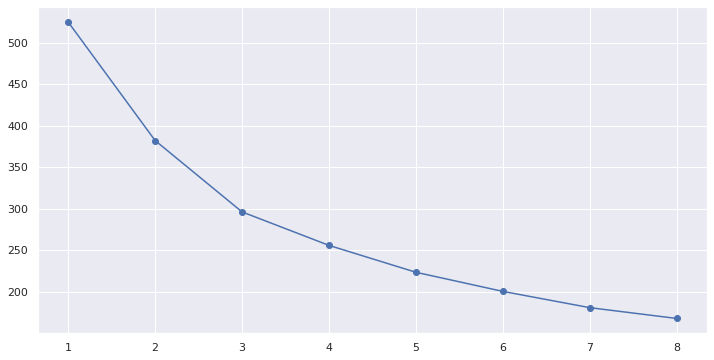

In [164]:
plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

In [167]:
#calculate SC for K=2 through K=8
from sklearn import metrics

k_range = range(2, 9)
scores = []
for k in k_range:
    km = KMeans(n_clusters=k, random_state=1)
    km.fit(cluster_data_sc)
    scores.append(metrics.silhouette_score(cluster_data_sc, km.labels_))

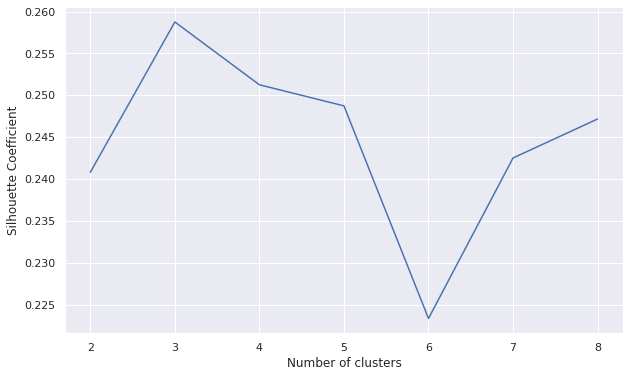

In [168]:
# plot the results
plt.plot(k_range, scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')
plt.grid(True)

From silhouttee coefficients we are getting 3 as our optimum number of clusters

In [181]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(cluster_data_sc)
y_predicted

array([0, 1, 0, 0, 1, 0, 1, 2, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 2, 0, 1,
       1, 0, 2, 1, 2, 1, 1, 0, 1, 2, 2, 0, 2, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 2, 2, 2, 0, 1, 0, 1, 2, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 2, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 2, 1, 1, 2, 2,
       0, 2, 0, 0, 0, 2, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0], dtype=int32)

In [182]:
pd.Series(km.labels_).value_counts()

1    46
0    42
2    17
dtype: int64

In [195]:
cluster_df['cluster']=y_predicted

In [196]:
cluster_df['Cuisines'] = cluster_df['Cuisines'].apply(lambda x : x.split(","))

AttributeError: ignored

In [197]:
exploded = cluster_df.explode("Cuisines")

In [198]:
exploded.head()

,Name,Cost,Cuisines,cuisine_Dessert,cuisine_Healthy food,cuisine_spicy food,cuisine_fast food,cluster
0,10 Downing Street,1900,north indian,0,0,2,1,0
0,10 Downing Street,1900,chinese,0,0,2,1,0
0,10 Downing Street,1900,continental,0,0,2,1,0
1,13 Dhaba,450,north indian,0,0,1,0,1
2,"3B's - Buddies, Bar & Barbecue",1100,north indian,0,2,1,0,0


In [199]:
exploded[exploded["cluster"]==0]['Cuisines'].unique()

array(['north indian', ' chinese', ' continental', ' mediterranean',
       ' european', 'european', ' north indian', ' seafood', ' biryani',
       ' hyderabadi', 'continental', 'american', 'biryani',
       ' south indian', ' andhra', 'mediterranean', ' kebab', ' bbq',
       'chinese', ' italian', ' asian', ' mughlai', ' beverages',
       'modern indian', 'asian', ' desserts', ' spanish', ' japanese',
       ' salad', ' sushi', 'andhra', 'italian', 'mexican', 'kebab',
       'thai', ' malaysian', ' thai', ' indonesian', 'seafood', ' goan',
       'bbq', ' modern indian', ' finger food', 'healthy food'],
      dtype=object)

In [200]:
exploded[exploded["cluster"]==1]['Cuisines'].unique()

array(['north indian', 'continental', ' american', ' chinese', 'american',
       ' fast food', ' salad', ' burger', ' biryani', ' mughlai', 'asian',
       'mughlai', 'chinese', ' seafood', ' asian', ' momos', 'fast food',
       ' pizza', 'burger', ' continental', 'biryani', ' north indian',
       'hyderabadi', ' japanese', ' sushi', 'finger food', ' kebab',
       'arabian', 'south indian', 'street food', ' arabian', 'momos',
       'lebanese', ' andhra', ' thai', 'north eastern'], dtype=object)

In [201]:
exploded[exploded["cluster"]==2]['Cuisines'].unique()

array(['ice cream', ' desserts', 'cafe', ' bakery', ' continental',
       ' fast food', ' beverages', 'desserts', ' cafe', ' burger',
       'fast food', ' biryani', 'bakery', ' north indian', ' mughlai',
       ' juices', ' chinese', ' mithai', 'american', ' wraps'],
      dtype=object)

(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

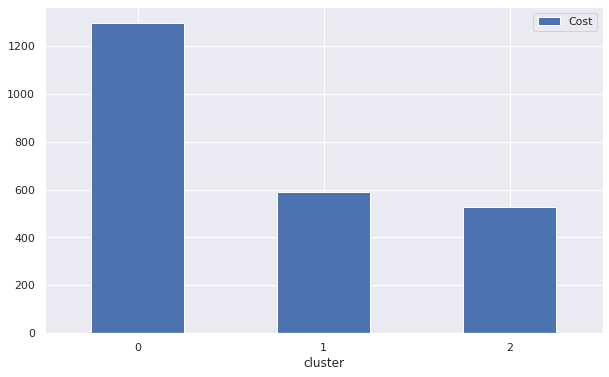

In [203]:
pd.DataFrame(cluster_df.groupby('cluster')['Cost'].mean()).plot(kind="bar")
plt.xticks(rotation=0)

In [206]:
cluster_df.loc[:,['Name','Cost','Cuisines','cluster']].head(30)

,Name,Cost,Cuisines,cluster
0,10 Downing Street,1900,"[north indian, chinese, continental]",0
1,13 Dhaba,450,[north indian],1
2,"3B's - Buddies, Bar & Barbecue",1100,"[north indian, mediterranean, european]",0
3,AB's - Absolute Barbecues,1500,"[european, mediterranean, north indian]",0
4,Absolute Sizzlers,750,"[continental, american, chinese]",1
5,Al Saba Restaurant,750,"[north indian, chinese, seafood, biryani, ...",0
6,American Wild Wings,600,"[american, fast food, salad, burger]",1
7,Amul,150,"[ice cream, desserts]",2
8,Angaara Counts 3,500,"[north indian, biryani, chinese]",1
9,Arena Eleven,1600,[continental],0


 # Herarchical Clustering

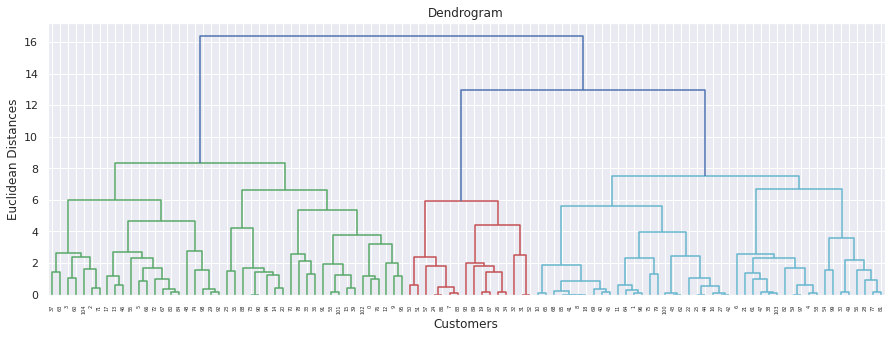

In [208]:
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(15,5))
dendrogram = sch.dendrogram(sch.linkage(cluster_data_sc, method = 'ward'))

plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distances')

plt.show() # find largest vertical distance we can make without crossing any other horizontal line

In [210]:
# Fitting hierarchical clustering to the mall dataset
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(cluster_data_sc)

In [211]:
cluster_df['cluster_hr']=y_hc

In [212]:
result=cluster_df.loc[:,['Name','Cost','Cuisines','cluster','cluster_hr']]

In [213]:
result.head(20)

,Name,Cost,Cuisines,cluster,cluster_hr
0,10 Downing Street,1900,"[north indian, chinese, continental]",0,1
1,13 Dhaba,450,[north indian],1,0
2,"3B's - Buddies, Bar & Barbecue",1100,"[north indian, mediterranean, european]",0,1
3,AB's - Absolute Barbecues,1500,"[european, mediterranean, north indian]",0,1
4,Absolute Sizzlers,750,"[continental, american, chinese]",1,0
5,Al Saba Restaurant,750,"[north indian, chinese, seafood, biryani, ...",0,1
6,American Wild Wings,600,"[american, fast food, salad, burger]",1,0
7,Amul,150,"[ice cream, desserts]",2,0
8,Angaara Counts 3,500,"[north indian, biryani, chinese]",1,0
9,Arena Eleven,1600,[continental],0,1
